<a href="https://colab.research.google.com/github/MKPadmavathi/unp-assignments/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
import sklearn


In [156]:
data=pd.read_csv("/content/garments_worker_productivity.csv")

In [157]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1197 non-null   int64  
 1   quarter              1197 non-null   int64  
 2   department           1197 non-null   int64  
 3   team                 1197 non-null   int64  
 4   smv                  1197 non-null   float64
 5   over_time            1197 non-null   int64  
 6   incentive            1197 non-null   int64  
 7   no_of_workers        1197 non-null   float64
 8   actual_productivity  1197 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 84.3 KB


In [158]:
data.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [199]:
np.sum(data.isna())

index                  0
quarter                0
department             0
team                   0
smv                    0
over_time              0
incentive              0
no_of_workers          0
actual_productivity    0
dtype: int64

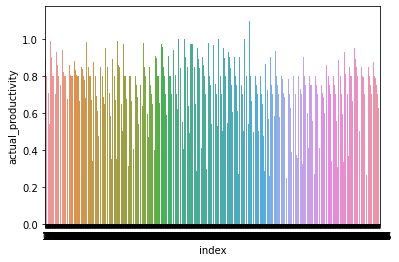

In [201]:
sns.barplot(x='index',y='actual_productivity',data=data)

In [202]:
data.head()

,index,quarter,department,team,smv,over_time,incentive,no_of_workers,actual_productivity
0,0,1,1,8,26.16,7080,98,59.0,0.940725
1,1,1,1,1,3.94,960,0,8.0,0.886500
2,2,1,1,11,11.41,3660,50,30.5,0.800570
3,3,1,1,12,11.41,3660,50,30.5,0.800570
4,4,1,1,6,25.90,1920,50,56.0,0.800382


In [159]:
data['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [160]:
data["department"].replace('finishing','finishing',inplace=True)

In [161]:
data["day"].replace('Monday',0,inplace=True)
data["day"].replace('Tuesday',1,inplace=True)
data["day"].replace('Wednesday',2,inplace=True)
data["day"].replace('Thursday',3,inplace=True)
data["day"].replace('Friday',4,inplace=True)
data["day"].replace('Saturday',5,inplace=True)

In [162]:
data["quarter"].replace('Quarter1',1,inplace=True)
data["quarter"].replace('Quarter2',2,inplace=True)
data["quarter"].replace('Quarter3',3,inplace=True)
data["quarter"].replace('Quarter4',4,inplace=True)
data["quarter"].replace('Quarter5',5,inplace=True)

In [163]:
data["department"].replace('sweing',1,inplace=True)
data["department"].replace('finishing',2,inplace=True)


In [164]:
data.drop(['date', 'day', 'targeted_productivity' , 'wip','idle_time' , 'idle_men' , 'no_of_style_change'],axis=1,inplace=True)

In [165]:
data

,quarter,department,team,smv,over_time,incentive,no_of_workers,actual_productivity
0,1,1,8,26.16,7080,98,59.0,0.940725
1,1,finishing,1,3.94,960,0,8.0,0.886500
2,1,1,11,11.41,3660,50,30.5,0.800570
3,1,1,12,11.41,3660,50,30.5,0.800570
4,1,1,6,25.90,1920,50,56.0,0.800382
...,...,...,...,...,...,...,...,...
1192,2,2,10,2.90,960,0,8.0,0.628333
1193,2,2,8,3.90,960,0,8.0,0.625625
1194,2,2,7,3.90,960,0,8.0,0.625625
1195,2,2,9,2.90,1800,0,15.0,0.505889


In [166]:
data.isna().sum()

quarter                0
department             0
team                   0
smv                    0
over_time              0
incentive              0
no_of_workers          0
actual_productivity    0
dtype: int64

In [167]:
data.head()

,quarter,department,team,smv,over_time,incentive,no_of_workers,actual_productivity
0,1,1,8,26.16,7080,98,59.0,0.940725
1,1,finishing,1,3.94,960,0,8.0,0.886500
2,1,1,11,11.41,3660,50,30.5,0.800570
3,1,1,12,11.41,3660,50,30.5,0.800570
4,1,1,6,25.90,1920,50,56.0,0.800382


In [168]:
data['department'].value_counts()

1             691
finishing     257
2             249
Name: department, dtype: int64

In [169]:
data["department"].replace('finishing ','finishing',inplace=True)

In [170]:
data["department"].replace('sweing','sewing',inplace=True)

In [171]:
data['department'].value_counts()

1            691
finishing    257
2            249
Name: department, dtype: int64

In [172]:
data["quarter"].replace('Quarter1',1,inplace=True)
data["quarter"].replace('Quarter2',2,inplace=True)
data["quarter"].replace('Quarter3',3,inplace=True)
data["quarter"].replace('Quarter4',4,inplace=True)
data["quarter"].replace('Quarter5',5,inplace=True)



In [173]:
data["department"].replace('sewing',0,inplace=True)
data["department"].replace('finishing',1,inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

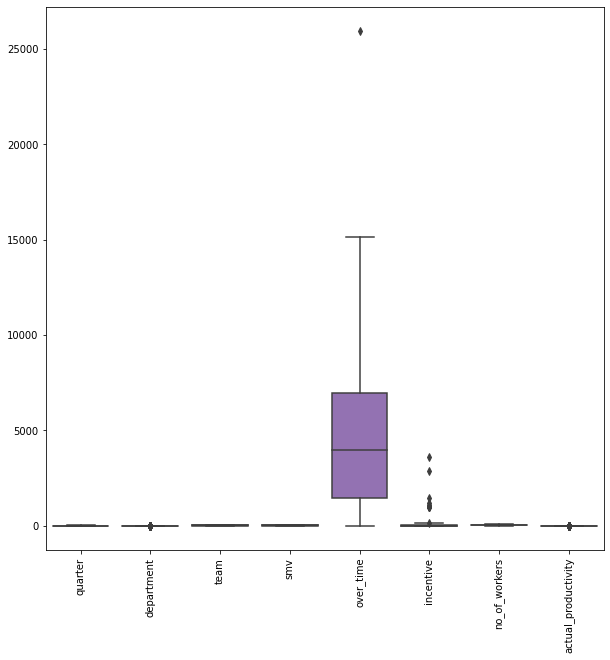

In [174]:
plt.figure(figsize=(10,10))
p = sns.boxplot(data = data,orient = 'v',width=0.8)
plt.xticks(rotation=90)

In [175]:
Q1 = data.incentive.quantile(0.25)
Q3 = data.incentive.quantile(0.75)
Q1, Q3

(0.0, 50.0)

In [176]:
Inter_quartile_range = Q3 - Q1
Inter_quartile_range

50.0

In [177]:
lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

(-75.0, 125.0)

In [178]:
data[(data.incentive<lower_limit)|(data.incentive>upper_limit)]

,quarter,department,team,smv,over_time,incentive,no_of_workers,actual_productivity
730,2,1,1,22.52,0,138,57.0,1.100484
1128,2,2,11,2.90,0,960,8.0,0.960625
1129,2,2,12,4.60,0,1080,9.0,0.902963
1130,2,2,5,3.94,0,2880,12.0,0.864343
1133,2,2,9,2.90,0,3600,15.0,0.841000
1137,2,2,3,4.60,0,1440,12.0,0.795417
1138,2,2,4,3.94,0,960,8.0,0.795388
1139,2,2,1,3.94,0,960,8.0,0.794567
1143,2,2,2,3.90,0,1200,10.0,0.682500
1148,2,2,10,2.90,0,960,8.0,0.477292


In [179]:
datai = data[(data.incentive>lower_limit)&(data.incentive<upper_limit)]

In [180]:
datai.shape

(1186, 8)

In [181]:
Q1 = datai.over_time.quantile(0.25)
Q3 = datai.over_time.quantile(0.75)
Q1 , Q3

(1440.0, 6960.0)

In [182]:
Inter_quartile_range = Q3 - Q1
Inter_quartile_range

5520.0

In [183]:
lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

(-6840.0, 15240.0)

In [184]:
datai[(datai.over_time<lower_limit)|(datai.over_time>upper_limit)]

,quarter,department,team,smv,over_time,incentive,no_of_workers,actual_productivity
146,2,1,11,12.52,25920,38,54.0,0.349951


In [185]:
datao = datai[(datai.over_time>lower_limit)&(datai.over_time<upper_limit)]

In [186]:
datao.shape

(1185, 8)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

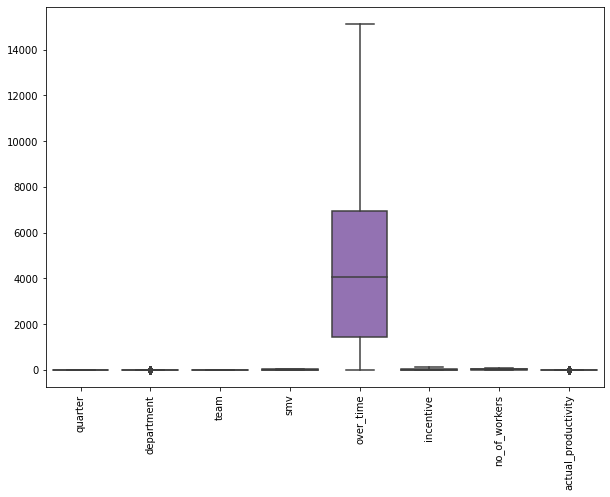

In [188]:
plt.figure(figsize=(10,7))
p = sns.boxplot(data = datao, orient = 'v',width=0.8)
plt.xticks(rotation=90)

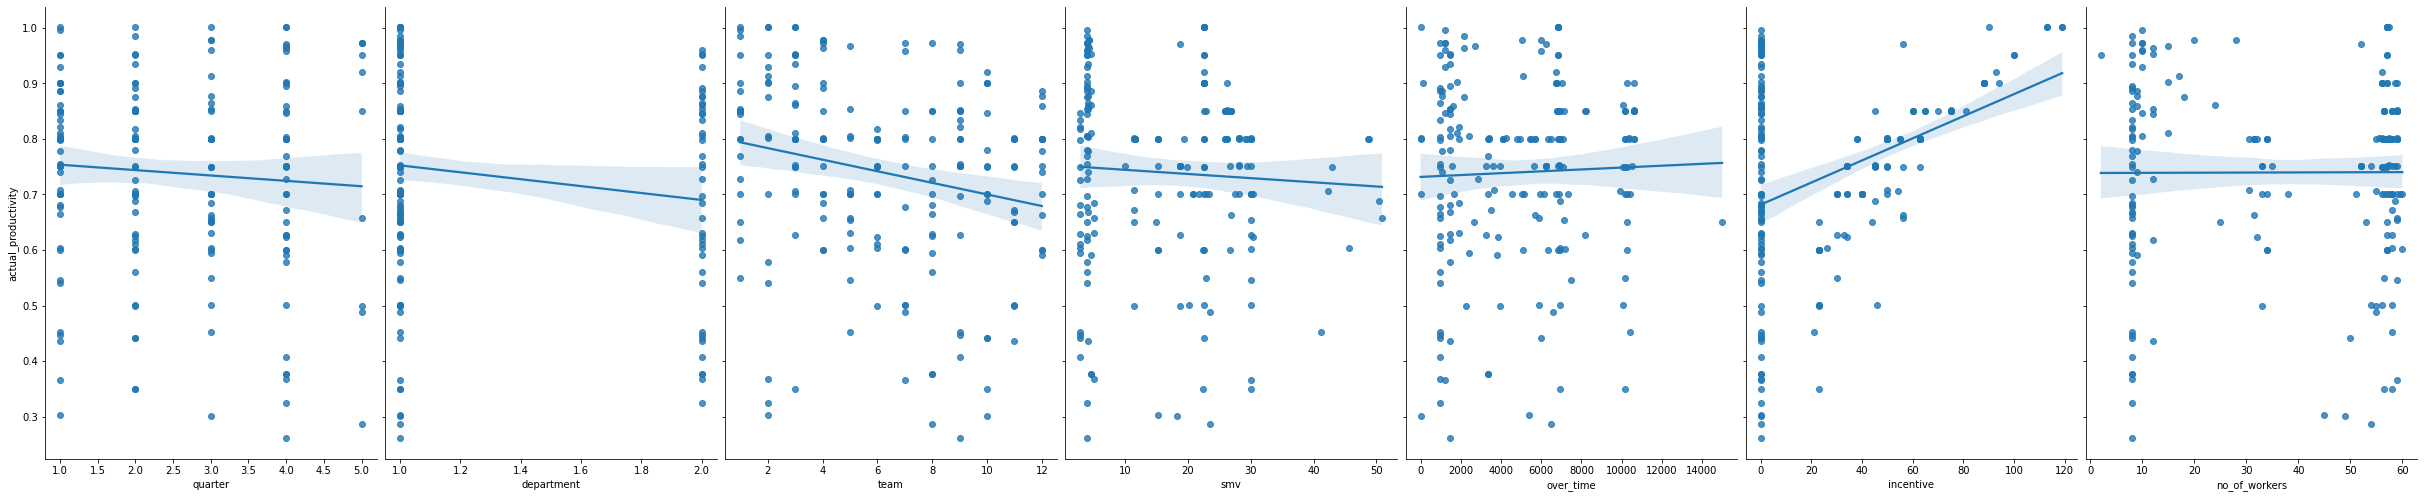

In [190]:
sns.pairplot(datao.sample(200),x_vars=['quarter','department','team','smv','over_time','incentive','no_of_workers'],y_vars='actual_productivity',size=7 , aspect=0.7 , kind = 'reg')

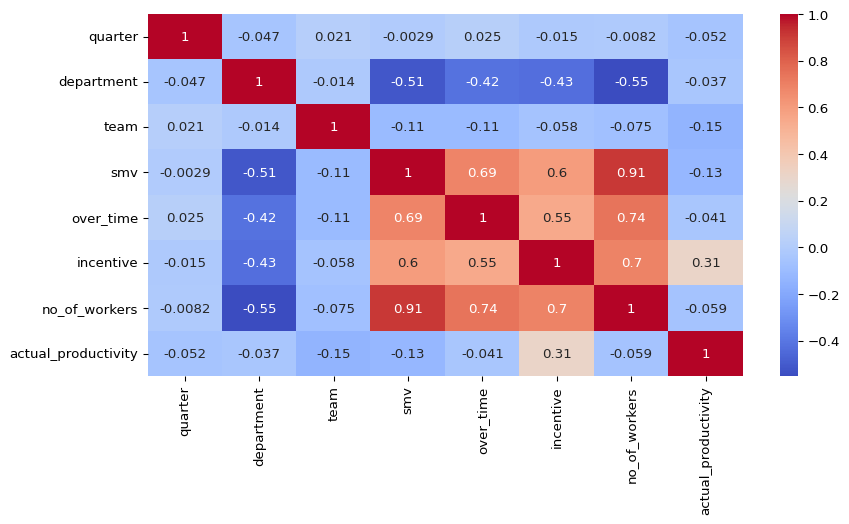

In [191]:
corr_data=datao.iloc[:,:].corr()
plt.figure(figsize=(10,5),dpi=96)
sns.heatmap(data = corr_data,annot = True,cmap = 'coolwarm')
plt.show()

In [192]:
import statsmodels.formula.api as smf

In [193]:
lm1 = smf.ols(formula='actual_productivity ~ quarter+team+department+incentive+smv',data=datao).fit()

lm1.rsquared

0.2803659098179283

In [194]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     actual_productivity   R-squared:                       0.280
Model:                             OLS   Adj. R-squared:                  0.277
Method:                  Least Squares   F-statistic:                     91.87
Date:                 Wed, 17 Aug 2022   Prob (F-statistic):           9.45e-82
Time:                         15:46:55   Log-Likelihood:                 588.26
No. Observations:                 1185   AIC:                            -1165.
Df Residuals:                     1179   BIC:                            -1134.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8760      0.025     35.682      0.000       0.828       0.924
quarter       -0.0063      0.004     -1.800      0.072      -0.013       0.001
team          -0.0085      0.001     -6.792      0.000      -0.011      -0.006
department    -0.0259      0.013     -2.034      0.042      -0.051      -0.001
incentive      0.0034      0.000     18.908      0.000       0.003       0.004
smv           -0.0084      0.001    -15.979      0.000      -0.009      -0.007
==============================================================================
Omnibus:                       97.043   Durbin-Watson:                   1.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.571
Skew:                          -0.676   Prob(JB):                     7.31e-29
Kurtosis:                       3.893   Cond. No.                         269.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [195]:
data=data.reset_index()

In [196]:
data.head()

,index,quarter,department,team,smv,over_time,incentive,no_of_workers,actual_productivity
0,0,1,1,8,26.16,7080,98,59.0,0.940725
1,1,1,1,1,3.94,960,0,8.0,0.886500
2,2,1,1,11,11.41,3660,50,30.5,0.800570
3,3,1,1,12,11.41,3660,50,30.5,0.800570
4,4,1,1,6,25.90,1920,50,56.0,0.800382


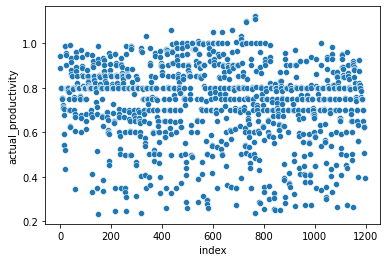

In [197]:
sns.scatterplot(x='index',y='actual_productivity',data=data)